# Multiple Subplots

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

``plt.axes`` function을 통해 여러 axes를 생성할 수 있다.

만일 4개의 argument를 전달한다면 순서대로  ``[left, bottom, width, height]``을 의미한다. (전체를 1.0으로 본다.)

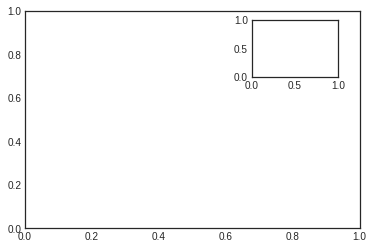

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

object-oriented interface에서는  ``fig.add_axes()``을 통해 구현할 수 있다.

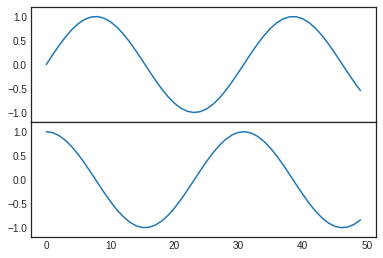

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## ``plt.subplot``: Simple Grids of Subplots

grid 방식의 subplot을 만들때는 ``plt.subplot()``을 이용할 수 있으며 왼쪽위로부터 오른쪽아래 순으로 index(3번째 argument)가 정해진다. 

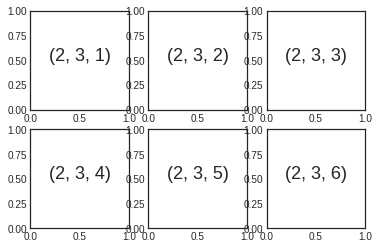

In [0]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

 ``plt.subplots_adjust``및 같은 부류의 함수는 subplot들 사이의 간격을 조절한다.
 
 또한 아래 코드처럼 object-oriented command ``fig.add_subplot()``를 사용하여 subplot을 만들 수 있다.

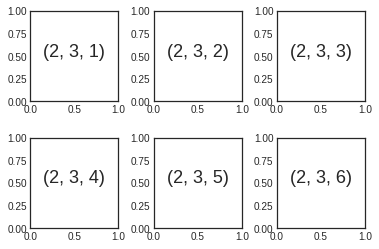

In [4]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## ``plt.subplots``: The Whole Grid in One Go

하지만 다수의 subplot 을 위와 같이 하나씩 만들기 보다는 ``plt.subplots()``을 통해 한꺼번에 편리하게 만들 수 있다. 

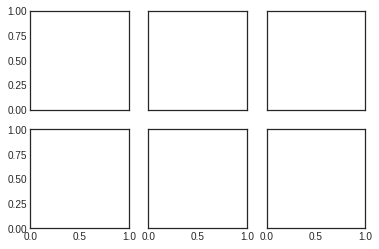

In [5]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Return받은 ax변수가 Numpy array이므로 다음과 같이 활용할 수 있다. 

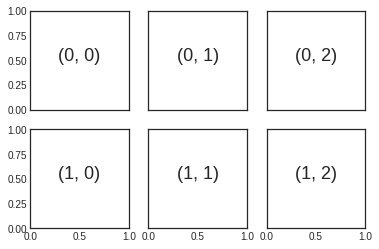

In [6]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

``plt.subplot()``와 달리 ``plt.subplots()``은 0-based indexing을 하므로 보다 익숙하다.

## ``plt.GridSpec``: More Complicated Arrangements

같은 크기가 아닌 subplot을 그린다면 ``plt.GridSpec()``을 이용하여 layout을 잡을 수 있다. 

In [0]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

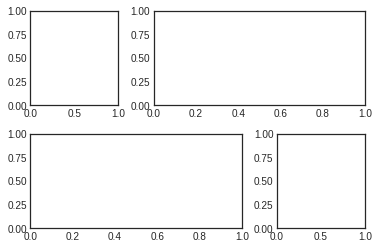

In [8]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

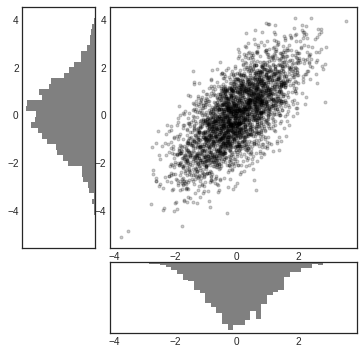

In [17]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()